In [1]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [4]:
%matplotlib notebook

In [85]:
import numpy as np
import pandas as pd
import scipy
import math
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import math
from sklearn.model_selection import train_test_split
from datetime import datetime
from notebooks.manifold_reg.util import *
from notebooks.manifold_reg.grad_util import *

In [6]:
X, beta, y_log = generate_log_data(20, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=100)

In [61]:
assoc_mat = get_assoc_mat(20, 10)
assoc_mat.shape

(220, 220)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.5, stratify=y_log, random_state=42)
# X_train, X_test = preprocess_data(X_train, X_test)

In [10]:
n_iter = 15
l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
l2_vals = np.logspace(-5, 1, n_iter)
# l2_vals = np.concatenate([np.array([0]), l2_vals])
gammas = np.logspace(-2, 3, 10)

In [12]:
def add_bias(X):
    return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

In [72]:
from notebooks.manifold_reg.grad_util import run_logisitic_reg_exp, build_table_from_log, run_logisitic_reg_exp_no_bp

train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0, \
    train_l1_pen_0, test_l1_pen_0, train_l2_pen_0, test_l2_pen_0, min_l1_vals_0, min_l2_vals_0, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_1_df = build_table_from_log(gammas, train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0,
                                train_l1_pen_0, test_l1_pen_0, min_l1_vals_0, train_l2_pen_0, test_l2_pen_0, min_l2_vals_0)

res_1_df

[2022-02-26 16:44:36.724730] - gamma - 0.01
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.4024740886890318, Test error: 0.29707097913756253
ll_pen_train: 0.0425051355912642, l1_pen_train: 2.4123697583837207, l2_pen_train: 0.0
[2022-02-26 16:47:09.433512] - gamma - 0.04
Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3435745376243758, Test error: 0.3260732995685197
ll_pen_train: 0.042431703343953665, l1_pen_train: 2.5049811448269304, l2_pen_train: 0.0
[2022-02-26 16:49:38.105529] - gamma - 0.13


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xa

Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3424904035789453, Test error: 0.3394956059994119
ll_pen_train: 0.04251421720183455, l1_pen_train: 2.4508787662994607, l2_pen_train: 2.2547836737456205e-225
[2022-02-26 16:52:03.247987] - gamma - 0.46
Min l1: 0.01, Min l2: 3.727593720314938, CV Error: 0.36358062795830903, Test error: 6.200614974354352
ll_pen_train: 0.04237831264590345, l1_pen_train: 2.469808978516155, l2_pen_train: 5.439993263096953e-18
[2022-02-26 16:54:31.799256] - gamma - 1.67


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: ove

Min l1: 0.01, Min l2: 1e-05, CV Error: 0.3773556307689449, Test error: 0.3466163251398413
ll_pen_train: 0.040865602461358994, l1_pen_train: 2.528384519399529, l2_pen_train: 27.696311597344867
[2022-02-26 16:55:49.540818] - gamma - 5.99


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: ove

Min l1: 0.13894954943731375, Min l2: 1e-05, CV Error: 0.5373249753317824, Test error: 0.49768033362080766
ll_pen_train: 0.39631927781137233, l1_pen_train: 0.7679173060672803, l2_pen_train: 1413.6397610018998
[2022-02-26 16:56:07.994013] - gamma - 21.54


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  retu

Min l1: 0.19306977288832497, Min l2: 1e-05, CV Error: 0.6155616252769166, Test error: 0.5847865041013582
ll_pen_train: 0.4344790879625468, l1_pen_train: 0.9060007729287536, l2_pen_train: 3543.261371770498
[2022-02-26 16:56:22.914700] - gamma - 77.43


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow

Min l1: 0.19306977288832497, Min l2: 1e-05, CV Error: 0.5802874649012406, Test error: 0.5848947727009999
ll_pen_train: 0.387837069556373, l1_pen_train: 0.999222934939562, l2_pen_train: 4634.736657203563
[2022-02-26 16:56:38.306813] - gamma - 278.26


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: ove

Min l1: 0.19306977288832497, Min l2: 1e-05, CV Error: 0.5896818049348409, Test error: 0.5534786750323262
ll_pen_train: 0.42871876895502997, l1_pen_train: 0.9249615099508521, l2_pen_train: 4543.538094286507
[2022-02-26 16:56:53.411160] - gamma - 1000.00


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: ove

Min l1: 0.19306977288832497, Min l2: 1e-05, CV Error: 0.6328355309358125, Test error: 0.6126131561002377
ll_pen_train: 0.4163908311954024, l1_pen_train: 0.9638806352045479, l2_pen_train: 6684.968459653743


,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.402474,0.01000,0.000010,0.042505,2.412370,0.000000e+00,0.297071,0.046071,2.607890,0.000000
1,0.035938,0.343575,0.01000,0.000010,0.042432,2.504981,0.000000e+00,0.326073,0.046498,2.528805,0.000000
2,0.129155,0.342490,0.01000,0.000010,0.042514,2.450879,2.254784e-225,0.339496,0.045663,2.714098,0.000000
3,0.464159,0.363581,0.01000,3.727594,0.042378,2.469809,5.439993e-18,6.200615,4.966221,8.490610,17138.722111
4,1.668101,0.377356,0.01000,0.000010,0.040866,2.528385,2.769631e+01,0.346616,0.033600,2.916054,916.890299
5,5.994843,0.537325,0.13895,0.000010,0.396319,0.767917,1.413640e+03,0.497680,0.485023,0.538033,25.570033
6,21.544347,0.615562,0.19307,0.000010,0.434479,0.906001,3.543261e+03,0.584787,0.573876,0.252566,5.687988
7,77.426368,0.580287,0.19307,0.000010,0.387837,0.999223,4.634737e+03,0.584895,0.588105,0.241489,6.133537
8,278.255940,0.589682,0.19307,0.000010,0.428719,0.924962,4.543538e+03,0.553479,0.567076,0.357452,13.418907
9,1000.000000,0.632836,0.19307,0.000010,0.416391,0.963881,6.684968e+03,0.612613,0.597890,0.197345,3.724800


In [73]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, train_l1_pen, test_l1_pen, min_l1_vals, _ = run_logisitic_reg_exp_no_bp(X_train, X_test, y_train, y_test, l1_vals)

res_2_df = build_table_from_log(gammas, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, lap=False)

res_2_df

Min l1: 0.01, CV Error: 0.3363740021085785, Test error: 0.3025366396737256
ll_pen_train: 0.04149003945437972, l1_pen_train: 2.478726931995775


,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,0.336374,0.01,0.04149,2.478727,0.302537,0.046912,2.584657


In [86]:
train_errs_cv_3, test_errs_3, train_ll_pen_3, test_ll_pen_3, \
    train_l1_pen_3, test_l1_pen_3, train_l2_pen_3, test_l2_pen_3, min_l1_vals_3, min_l2_vals_3, beta_vals_3 = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

res_3_df = build_table_from_log(gammas, train_errs_cv_3, test_errs_3, train_ll_pen_3, test_ll_pen_3,
                                train_l1_pen_3, test_l1_pen_3, min_l1_vals_3, train_l2_pen_3, test_l2_pen_3, min_l2_vals_3)

res_3_df

[2022-02-26 17:19:59.533941] - gamma - 0.01
Min l1: 0.013894954943731374, Min l2: 1e-05, CV Error: 0.4028845966148437, Test error: 0.2986749667367944
ll_pen_train: 0.06692486447349574, l1_pen_train: 1.9967358726210276, l2_pen_train: 0.0
[2022-02-26 17:37:10.755882] - gamma - 0.04
Min l1: 0.02682695795279726, Min l2: 1e-05, CV Error: 0.4262738122710136, Test error: 0.2842250577531984
ll_pen_train: 0.12609538174151677, l1_pen_train: 1.6071521066850623, l2_pen_train: 0.0
[2022-02-26 17:54:17.072983] - gamma - 0.13
Min l1: 0.019306977288832496, Min l2: 1e-05, CV Error: 0.4647700041986756, Test error: 0.35259778805733055
ll_pen_train: 0.0931283470631166, l1_pen_train: 1.732656550034746, l2_pen_train: 7.395158513320237e-225
[2022-02-26 18:11:43.085570] - gamma - 0.46
Min l1: 0.019306977288832496, Min l2: 1e-05, CV Error: 0.390233074868824, Test error: 0.31572913410646064
ll_pen_train: 0.09319919080690572, l1_pen_train: 1.806214311770344, l2_pen_train: 2.5638205851665587e-18
[2022-02-26 18:28

/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.

Min l1: 0.01, Min l2: 7.196856730011514e-05, CV Error: 0.34915745317166696, Test error: 0.35096013421120015
ll_pen_train: 0.04987041046498182, l1_pen_train: 2.21497671295797, l2_pen_train: 12627.033292564049
[2022-02-26 19:03:10.784581] - gamma - 21.54


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/not

Min l1: 0.013894954943731374, Min l2: 7.196856730011514e-05, CV Error: 0.37301081979817596, Test error: 0.3043285284138988
ll_pen_train: 0.07109478922593024, l1_pen_train: 1.8891159652827483, l2_pen_train: 17010.796339173354
[2022-02-26 19:20:18.648106] - gamma - 77.43


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.py:67: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y*f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:40: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/grad_util.

KeyboardInterrupt: 

In [ ]:
import traceback
from notebooks.manifold_reg.log_util import log_msg

results_1 = []
results_2 = []

n_sim = 10
assoc_mat = get_assoc_mat(200, 10)
beta_vals_1 = np.zeros((n_sim, 1, assoc_mat.shape[1]))
beta_vals_2 = np.zeros((n_sim, 1, assoc_mat.shape[1]))

gamma = np.array([1.67])
for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=100)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False, lap_norm=True)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, min_l1_vals_1, train_l2_pen_1, test_l2_pen_1, min_l2_vals_1)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_2[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, None, l2_norm=False)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)


        results_1.append(res_pen_df)
        results_2.append(res_no_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

In [181]:
results_pen_1_df = pd.concat(results_1, axis=0)
results_no_pen_2_df = pd.concat(results_2, axis=0)

In [182]:
results_pen_1_df.mean()

gamma                  1.670000
min_train_err_cv       0.533974
l1_train_cv            0.088476
l2_train_cv            0.000092
ll_pen_train_cv        0.165767
l1_pen_train_cv        1.269020
l2_pen_train_cv      291.555172
test_err               0.642693
ll_pen_test            0.153456
l1_pen_test            1.704182
l2_pen_test         1069.998210
dtype: float64

In [183]:
results_no_pen_2_df.mean()

gamma               1.670000
min_train_err_cv    0.548391
l1_train_cv         0.067532
ll_pen_train_cv     0.187286
l1_pen_train_cv     1.086907
test_err            0.552877
ll_pen_test         0.206753
l1_pen_test         1.138202
dtype: float64

In [9]:
beta_t = np.random.randn(beta.shape[0])

In [80]:
prec = get_emp_covariance(X_train, assoc_mat)
L = get_laplacian_mat(X_train, X_train, prec, 1.66, norm=True)

In [84]:
beta_0 = np.random.rand(X_train.shape[1])
scipy.optimize.fmin_l_bfgs_b(objective_log_loss_l1, x0=beta_0, approx_grad=True,
                                                    args=(X_train, y_train, L, 0.01, 0.001), maxiter=1000)

(array([ 9.31844500e-01,  1.49620849e-02,  6.12493447e-01, -1.37690453e-02,
         1.93818095e-03,  1.92654334e-01,  6.09009612e-05,  1.34407477e-01,
         2.09230372e-04,  1.37798204e-04,  8.56734765e-03,  1.28797086e-01,
         3.20654771e-01,  2.34390553e-04, -1.15608039e-02,  2.66682530e-02,
         1.00768981e-01,  1.56461500e-01,  6.04259380e-01, -2.66570429e-04,
        -4.24895122e-05,  6.65293995e-01,  3.87411015e-01, -1.75513372e-04,
        -3.55226464e-03,  3.58081788e-01,  7.41367648e-05,  8.55901296e-01,
         4.42350688e-01,  1.22066970e-01,  1.00264880e-04, -5.50892478e-05,
         4.58837907e-04,  3.79461520e-02,  1.50239113e-04,  9.24305178e-01,
         6.93881837e-04,  4.47424207e-01, -1.45830678e-04,  3.13408068e-02,
         1.92384245e-04,  9.73379627e-01,  7.69269559e-06,  7.79231027e-03,
         5.59987802e-04,  2.20792306e-01,  8.63646830e-03,  7.94702142e-05,
         2.02355874e-01,  3.48664095e-01, -2.97627059e-04,  1.25484016e-01,
        -4.0

In [76]:
from mpl_toolkits.mplot3d import Axes3D
# plt.ion()
ms = np.linspace(beta[0] - 5, beta[0] + 5, 20)
bs = np.linspace(beta[1] - 5, beta[1] + 5, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X_train[:,[0, 1]], y_train, L, 0.01, 3.71) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours

ax.plot_surface(M, B, Z, rstride=5, cstride=5, color='b', alpha=0.5)
ax.plot([0.0], [0.0], [0.0] , markerfacecolor='r', marker='o', markersize=3)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-60)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_788/922556475.py:18: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


/tmp/ipykernel_4850/185568810.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


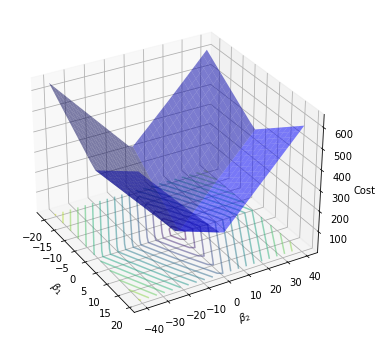

In [40]:
zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 10.0, 0.0) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
plt.show()

In [86]:
ms = np.linspace(beta_t[0] - 5, beta_t[0] + 5, 40)
bs = np.linspace(beta_t[1] - 5, beta_t[1] + 5, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 0.0, 0.0) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 0.0, 10.0) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.plot([0.0], [0.0], [0.0] , markerfacecolor='r', marker='o', markersize=3);
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/1266891428.py:18: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [92]:
ms = np.linspace(beta_t[0] - 20, beta_t[0] + 20, 40)
bs = np.linspace(beta_t[1] - 20, beta_t[1] + 20, 40)

M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l1(b, X[:,[0, 1]], y_log, L, 0.01, 0.01) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/4220103904.py:14: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [97]:
zs = np.array([objective_log_loss_l2(b, X[:,[0, 1]], y_log, L, 3, 0.01) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
plt.show()

<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/758297784.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [50]:


def batch_gradient_descent(X, y, L, l1, l2, step=1e-1, max_iter=100, tol=1e-2, l2_norm=False):
    #randomly initialize beta
    n, p = X.shape
    beta = np.random.rand(p)

    #initialise histories
    losses = [log_loss_cp(X, y, beta)]
    betas = [beta.copy()]
    for i in range(max_iter):
        if l2_norm:
            grad = grad_log_loss_l2(beta, X, y, L, l1, l2)
        else:
            grad = grad_log_loss_l1(beta, X, y, L, l1, l2)

        beta -= step * grad
        loss = log_loss_cp(X, y, beta)
        losses.append(loss)
        betas.append(beta.copy())

        if np.sqrt(grad.dot(grad)) < tol: break

    return np.array(betas), np.array(losses)

Plot the path of gradient descent with $||\beta||_{1}$ penalty and $\lambda_{1} = 0.1$, $\lambda_{2} = 1.0$, $\gamma = 1.0$

In [135]:
X_train_bt = add_bias(X_train)
prec_mat = get_emp_covariance(X_train_bt, assoc_mat)
L = get_laplacian_mat(X_train_bt, X_train_bt, prec_mat, 1.67, norm=True)

ValueError: operands could not be broadcast together with shapes (220,220) (221,221) 

In [161]:
# X_bt = add_bias(X)
betas_l1_1, losses_l1_1 = batch_gradient_descent(X_train, y_train, L, 10.0, 0.1, max_iter=1000, step=1e-2, l2_norm=True)
print(betas_l1_1[-1])
print(losses_l1_1[-1])


[  7.30680806   4.11014907   4.92807109   2.90348995   4.08562382
   6.57855069   3.79256421   5.80195207   5.70831655   5.84816979
   3.94059727  -4.18092747  -1.58302558  -3.86299835  -1.39558842
  -3.63492968  -2.44439941  -1.92567612  -1.45656014  -1.04561229
  -5.24503064  -0.62603281  -1.97293994  -1.92943255  -1.13506342
  -0.6195095   -1.31043803   0.89698614  -3.07928779  -0.41149318
  -1.02825652  -3.90771779  -1.08611279   1.53285784   0.31697192
   2.10162152   0.07438457   1.21289284   1.33115069   1.94534819
   3.69458825   0.38862738   1.93435861  -0.27749875  -2.97752232
  -1.08377682  -1.38453887  -2.23959923  -0.98722813  -2.69058114
  -3.00243865  -0.94200845  -3.19659468  -3.2473089   -3.20985207
  -1.11087175  -1.82409147  -1.8753157   -1.09980029  -4.86051717
   0.81227367  -1.59616778   0.26460556  -0.46961     -2.56170609
  -2.65418734 -14.48569166 -10.7323992  -10.34638144 -12.38116972
  -6.43443756 -12.4513167  -10.13551814  -9.72221708  -9.39998752
 -10.50521

In [162]:
losses_l1_1[-1]

14.881455043638544

In [163]:
ms = np.linspace(beta[0] - 20 , beta[0] + 20, 20)
bs = np.linspace(beta[1] - 40 , beta[1] + 40, 40)
M, B = np.meshgrid(ms, bs)
zs = np.array([objective_log_loss_l2(b, X_train[:,[0, 1]], y_train, L, 0.1, 0.1) for b in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d', xlabel=r'$\beta_{1}$',
                     ylabel=r'$\beta_{2}$', zlabel='Cost')

# plot mse loss hypersurface and contours
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)
ax.view_init(elev=30, azim=-30)
# plot start and end points
ax.plot([betas_l1_1[0][0]], [betas_l1_1[0][1]], [losses_l1_1[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([betas_l1_1[-1][0]], [betas_l1_1[-1][1]], [losses_l1_1[-1]] , markerfacecolor='b', marker='o', markersize=7)
#
# # plot gradient descent curves
ax.plot(betas_l1_1[:, 0], betas_l1_1[:, 1], losses_l1_1, markeredgecolor='r', marker='.', markersize=2)
ax.plot(betas_l1_1[:, 0], betas_l1_1[:, 1], 0, markeredgecolor='r', marker='.', markersize=2)

# set viewpoint

plt.show()


<IPython.core.display.Javascript object>

/tmp/ipykernel_4850/2786181167.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


In [158]:
log_loss_cp(X_train, y_train, betas_l1_1[-1])

0.5638304856916093